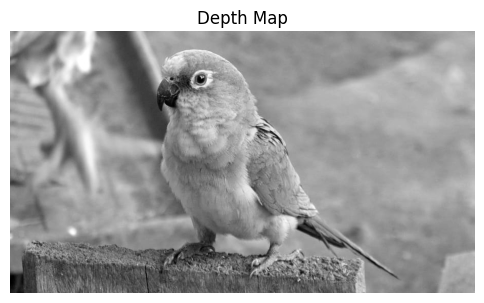

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the depth map
depth_map = Image.open('images/bird.jpeg').convert('L')  # Convert to grayscale
depth_array = np.array(depth_map)

plt.figure(figsize=(6, 6))  # Adjust the figure size
plt.imshow(depth_array, cmap='gray')  # Show as grayscale
plt.title('Depth Map')  # Add a title
plt.axis('off')  # Hide axes
plt.show()

In [ ]:
import cv2

def adjust_color(pattern_pixel, depth_value, max_depth):
    # Normalize the depth value
    normalized_depth = depth_value / max_depth
    
    # Adjust the hue based on depth
    hue_shift = int(normalized_depth * 180)  # OpenCV hue range
    hsv_pixel = cv2.cvtColor(np.uint8([[pattern_pixel]]), cv2.COLOR_RGB2HSV)
    hsv_pixel[0][0][0] = (hsv_pixel[0][0][0] + hue_shift) % 180
    return cv2.cvtColor(hsv_pixel, cv2.COLOR_HSV2RGB)[0][0]

In [ ]:
# Starting with generic base pattern
base_pattern = Image.open('patterns/base_pattern.png')
base_pattern_array = np.array(base_pattern)

height, width = depth_array.shape
max_depth = np.max(depth_array)
autostereogram = np.zeros((height, width, 3), dtype=np.uint8)

for y in range(height):
    for x in range(width):
        depth_value = depth_array[y, x]
        # Generate or fetch a pixel from the base pattern
        pattern_pixel = [255, 255, 255]  # Example RGB white pixel
        # Adjust the color based on depth
        autostereogram[y, x] = adjust_color(pattern_pixel, depth_value, max_depth)

# Save or display the final image
from PIL import Image
final_image = Image.fromarray(autostereogram)
final_image.save('autostereogram_with_depth_colors.png')